# **Anemia Classification: Identifying Types of Anemia Using Machine Learning**

In [1]:
pip install sweetviz

In [2]:
pip install feature_engine

In [3]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sweetviz
import joblib
import pickle
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from feature_engine.outliers import Winsorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from scipy.stats import randint


In [4]:
# Importing the dataset

data = pd.read_csv(r"/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/diagnosed_cbc_data_v4.csv")
data.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


In [5]:
data.info()  # Basic Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [6]:
data.describe()            # Basic Statistics

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280
max,45.700000,91.400000,5317.000000,41.800000,79.000000,90.800000,87.100000,3715.0000,990.000000,3117.000000,92.800000,660.000000,97.000000,13.600000


In [7]:
data.dtypes          # Data Types

WBC          float64
LYMp         float64
NEUTp        float64
LYMn         float64
NEUTn        float64
RBC          float64
HGB          float64
HCT          float64
MCV          float64
MCH          float64
MCHC         float64
PLT          float64
PDW          float64
PCT          float64
Diagnosis     object
dtype: object

In [8]:
# Checking whether null values present or not
data.isnull().sum()                             # No null values present

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [9]:
# Checking whether a data is duplicated or not
data.duplicated().sum()            # Duplicate values present

49

In [10]:
data = data.drop_duplicates()       # Duplicate value removed

In [11]:
# AutoEDA

my_report = sweetviz.analyze([data,'data'])
my_report.show_html('/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/anemia.html')

                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/anemia.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
# Separate the features and target

features = data.iloc[ : , :14]
target = data.iloc[ : , 14 :]

In [13]:
features.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22


In [14]:
target.head()

,Diagnosis
0,Normocytic hypochromic anemia
1,Normocytic hypochromic anemia
2,Iron deficiency anemia
3,Iron deficiency anemia
4,Normocytic hypochromic anemia


In [15]:
target.value_counts()

Diagnosis                     
Healthy                           323
Normocytic hypochromic anemia     271
Normocytic normochromic anemia    255
Iron deficiency anemia            184
Thrombocytopenia                   72
Other microcytic anemia            56
Leukemia                           44
Macrocytic anemia                  16
Leukemia with thrombocytopenia     11
Name: count, dtype: int64

# **Exploratory Data Analysis**

In [16]:
# First moment Business decision
features.mean()            # Mean

WBC        7.846713
LYMp      25.897658
NEUTp     77.591978
LYMn       1.884341
NEUTn      5.130724
RBC        4.714294
HGB       12.187589
HCT       46.269150
MCV       85.734099
MCH       32.250877
MCHC      31.739732
PLT      228.927922
PDW       14.340931
PCT        0.261623
dtype: float64

In [17]:
features.median()           # Median

WBC        7.400000
LYMp      25.845000
NEUTp     77.511000
LYMn       1.880760
NEUTn      5.140940
RBC        4.600000
HGB       12.200000
HCT       46.152600
MCV       86.550000
MCH       27.700000
MCHC      32.000000
PLT      211.000000
PDW       14.312512
PCT        0.260280
dtype: float64

In [18]:
features.mode()          # Mode

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,7.2,25.845,77.511,1.88076,5.14094,5.2,12.0,46.1526,91.0,29.0,32.0,360.0,14.312512,0.26028


In [19]:
# Second Moment Business Decision
features.var()                 # Variance

WBC         12.617984
LYMp        49.913398
NEUTp    22695.903410
LYMn         1.842431
NEUTn        8.384710
RBC          8.222667
HGB         14.924324
HCT      11437.442979
MCV        765.291448
MCH      12849.730687
MCHC        11.252748
PLT       8663.934492
PDW          9.326109
PCT          0.488230
dtype: float64

In [20]:
features.std()      # Standard Deviation

WBC        3.552180
LYMp       7.064941
NEUTp    150.651596
LYMn       1.357362
NEUTn      2.895636
RBC        2.867519
HGB        3.863201
HCT      106.945982
MCV       27.663902
MCH      113.356653
MCHC       3.354512
PLT       93.080258
PDW        3.053868
PCT        0.698735
dtype: float64

In [21]:
features.apply(lambda x : x.max() - x.min())       # Range

WBC        44.90
LYMp       85.20
NEUTp    5316.30
LYMn       41.60
NEUTn      78.50
RBC        89.44
HGB        97.10
HCT      3713.00
MCV      1069.30
MCH      3106.10
MCHC       81.30
PLT       650.00
PDW        88.60
PCT        13.59
dtype: float64

In [22]:
# Third Moment Business Decision
features.skew()                    # Skewness

WBC       3.895836
LYMp      1.719596
NEUTp    34.276037
LYMn     21.902550
NEUTn    15.901369
RBC      24.226970
HGB      11.581314
HCT      33.082867
MCV      28.200957
MCH      24.917689
MCHC      8.165199
PLT       0.458498
PDW      16.424788
PCT      17.425279
dtype: float64

In [23]:
# Fourth Moment Business Decision
features.kurt()              # Kurtosis

WBC        29.197476
LYMp       13.378195
NEUTp    1191.432391
LYMn      617.136863
NEUTn     371.196175
RBC       686.022801
HGB       220.918954
HCT      1128.963118
MCV       930.068796
MCH       631.319615
MCHC      134.216561
PLT         0.006441
PDW       436.669425
PCT       305.893173
dtype: float64

WBC         Axes(0.125,0.11;0.0466867x0.77)
LYMp     Axes(0.181024,0.11;0.0466867x0.77)
NEUTp    Axes(0.237048,0.11;0.0466867x0.77)
LYMn     Axes(0.293072,0.11;0.0466867x0.77)
NEUTn    Axes(0.349096,0.11;0.0466867x0.77)
RBC       Axes(0.40512,0.11;0.0466867x0.77)
HGB      Axes(0.461145,0.11;0.0466867x0.77)
HCT      Axes(0.517169,0.11;0.0466867x0.77)
MCV      Axes(0.573193,0.11;0.0466867x0.77)
MCH      Axes(0.629217,0.11;0.0466867x0.77)
MCHC     Axes(0.685241,0.11;0.0466867x0.77)
PLT      Axes(0.741265,0.11;0.0466867x0.77)
PDW      Axes(0.797289,0.11;0.0466867x0.77)
PCT      Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

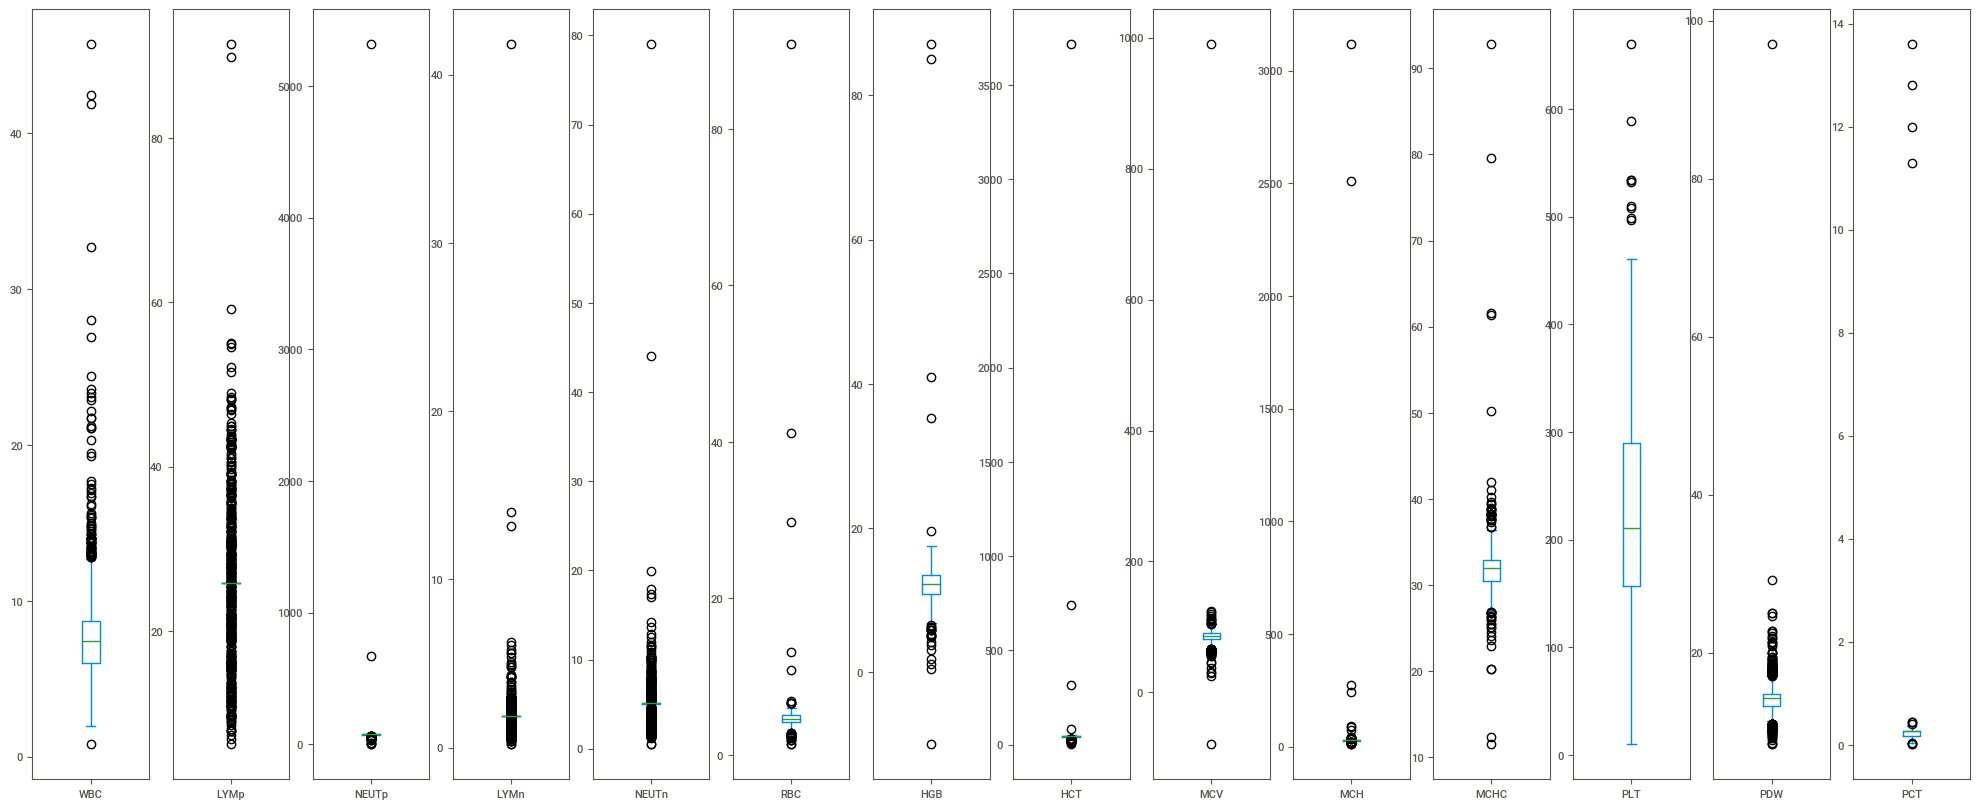

In [24]:
# Checking whether outliers present or not
# Visulaize using boxplot

features.plot(kind = 'box', subplots = True, sharey = False, figsize = (25,10))

In [25]:
winsor = Winsorizer(capping_method = 'quantiles',fold = 0.18, tail = 'both', variables = features.select_dtypes(include=[float, int]).columns.tolist())

In [26]:
# Normalize the values using Min-Max scaling
min_max = MinMaxScaler()

In [27]:
from sklearn.pipeline import Pipeline

# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ('winsorizer', winsor),
    ('min_max_scaler', min_max)
])

In [28]:
# Fit and transform the data
scaled_data = preprocessing_pipeline.fit_transform(features)

In [29]:
# Save the preprocessing pipeline
joblib.dump(preprocessing_pipeline, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/preprocessing_pipeline.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/preprocessing_pipeline.pkl']

In [30]:
# Convert the scaled data (NumPy array) to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=features.columns)
scaled_data

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT
0,1.000000,1.000000,0.0,1.000000,0.864603,0.000000,0.000000,0.0,0.693038,0.350877,0.033333,0.235441,0.000000,0.181357
1,1.000000,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.0,0.731973,0.245614,0.000000,0.186639,0.000000,0.090678
2,0.456595,1.000000,0.0,1.000000,0.288201,0.007634,0.000000,0.0,0.000000,0.000000,0.000000,0.013122,0.555556,0.000000
3,0.114149,1.000000,0.0,0.712352,0.000000,0.198473,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.0,0.140165,0.000000,0.000000,0.490294,0.000000,0.634748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,0.000000,0.836438,1.0,1.000000,1.000000,0.687023,0.864865,1.0,0.147952,0.596491,1.000000,0.186639,0.560189,1.000000
1228,0.000000,0.836438,1.0,1.000000,1.000000,0.679389,1.000000,1.0,1.000000,1.000000,1.000000,0.376423,0.560189,1.000000
1229,1.000000,0.836438,1.0,1.000000,1.000000,0.389313,0.756757,1.0,0.770908,0.877193,1.000000,0.994578,0.560189,1.000000
1230,0.251127,0.836438,1.0,1.000000,1.000000,0.603053,0.783784,1.0,0.615169,0.631579,0.700000,0.154105,0.560189,1.000000


In [117]:
label_encode = LabelEncoder()

In [118]:
target = label_encode.fit_transform(target)
target

array([5, 5, 1, ..., 0, 0, 0])

In [119]:
joblib.dump(label_encode,'/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/label_encoder.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/label_encoder.pkl']

In [120]:
# Save class labels separately
class_labels = label_encode.classes_

In [121]:
joblib.dump(class_labels, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/class_labels.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/class_labels.pkl']

# **LOGISTIC REGRESSION**

In [34]:
# Initilize the model
log_reg = LogisticRegression()

In [35]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(scaled_data, target, test_size = 0.2, random_state = 50)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(985, 14)
(247, 14)
(985,)
(247,)


In [37]:
# Fit the model
logistic = log_reg.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
joblib.dump(logistic,'/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/logistic.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/logistic.pkl']

In [39]:
model = joblib.load('/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/logistic.pkl')

In [40]:
log_train_pre = model.predict(x_train)

In [41]:
log_train_pre = accuracy_score(log_train_pre, y_train)
log_train_pre

0.8639593908629442

In [42]:
log_test_ = model.predict(x_test)

In [43]:
log_test_pre = accuracy_score(log_test_, y_test)
log_test_pre

0.7935222672064778

In [44]:
print(classification_report(log_test_, y_test))
print(confusion_matrix(log_test_, y_test))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        68
           1       1.00      0.78      0.88        41
           2       0.22      0.29      0.25         7
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.76      0.89      0.82        47
           6       0.96      0.82      0.88        60
           7       0.67      0.89      0.76         9
           8       0.53      0.60      0.56        15

    accuracy                           0.79       247
   macro avg       0.55      0.56      0.55       247
weighted avg       0.84      0.79      0.81       247

[[54  0  4  2  0  1  1  0  6]
 [ 2 32  1  0  0  5  0  1  0]
 [ 1  0  2  1  0  2  0  0  1]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1 42  1  0  1]
 [ 1  0  2  0  1  4 49  3  0]
 [ 0  0  0  0  0  1  0  8  0]
 [ 5  0  0  1  0  0  0  0  9]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **USE RANDOMIZED SEARCH CV FOR FINDING BEST ESTIMATORS**

In [45]:
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=0)

distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1'])


In [46]:
random_search_log = RandomizedSearchCV(logistic, distributions, random_state = 50)

In [47]:
best_log = random_search_log.fit(x_train, y_train)

In [48]:
joblib.dump(best_log,'/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_log.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_log.pkl']

In [49]:
best_log.best_estimator_

LogisticRegression(C=1.9784065821520858, max_iter=200, penalty='l1',
                   random_state=0, solver='saga', tol=0.01)

In [50]:
best_train_lo = best_log.predict(x_train)

In [51]:
best_train_log = accuracy_score(best_train_lo, y_train)
best_train_log

0.9015228426395939

In [52]:
best_test_lo = best_log.predict(x_test)

In [53]:
best_test_log  = accuracy_score(best_test_lo, y_test)
best_test_log

0.8340080971659919

In [54]:
print(classification_report(best_test_lo, y_test))
print(confusion_matrix(best_test_lo, y_test))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        66
           1       1.00      0.89      0.94        36
           2       0.22      0.29      0.25         7
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.82      0.94      0.87        48
           6       0.98      0.86      0.92        58
           7       0.92      0.85      0.88        13
           8       0.65      0.61      0.63        18

    accuracy                           0.83       247
   macro avg       0.60      0.58      0.59       247
weighted avg       0.86      0.83      0.85       247

[[55  0  5  0  0  0  1  0  5]
 [ 1 32  1  0  0  2  0  0  0]
 [ 0  0  2  1  0  3  0  0  1]
 [ 1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  1 45  0  0  0]
 [ 2  0  1  0  1  3 50  1  0]
 [ 0  0  0  0  0  2  0 11  0]
 [ 4  0  0  3  0  0  0  0 11]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Decision Tree**

In [55]:
decision_tree = DecisionTreeClassifier()
decision_tree

DecisionTreeClassifier()

In [56]:
dt = decision_tree.fit(x_train, y_train)

In [57]:
joblib.dump(dt, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/decision_tree.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/decision_tree.pkl']

In [58]:
model1 = joblib.load('/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/decision_tree.pkl')

In [59]:
dt_train_ = model1.predict(x_train)

In [60]:
dt_train_pre = accuracy_score(dt_train_, y_train)
dt_train_pre

1.0

In [61]:
dt_test_p = model1.predict(x_test)

In [62]:
dt_test_pre = accuracy_score(dt_test_p, y_test)
dt_test_pre

0.9595141700404858

In [63]:
print(classification_report(dt_test_p, y_test))
print(confusion_matrix(dt_test_p, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       1.00      1.00      1.00        32
           2       0.78      0.78      0.78         9
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         2
           5       0.98      0.98      0.98        55
           6       0.98      0.98      0.98        51
           7       1.00      1.00      1.00        12
           8       1.00      0.89      0.94        19

    accuracy                           0.96       247
   macro avg       0.80      0.84      0.81       247
weighted avg       0.96      0.96      0.96       247

[[63  0  2  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 2  0  7  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  1  0  0]
 [ 0  0  0  0  1 54  0  0  0]
 [ 0  0  0  0  1  0 50  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 17]]


# **USE RANDOMIZED SEARCH CV FOR FINDING BEST ESTIMATORS**

In [64]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': randint(1, 20),       # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)    # Minimum number of samples required at each leaf node
}

random_search_dt = RandomizedSearchCV(estimator = decision_tree, param_distributions = param_grid, n_iter = 100, cv = 5, random_state = 50)

In [65]:
best_dt = random_search_dt.fit(x_train, y_train)

In [66]:
joblib.dump(best_dt,'/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_dt.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_dt.pkl']

In [67]:
best_dt = best_dt.best_estimator_
best_dt

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=4)

In [68]:
dt_best_tr = best_dt.predict(x_train)

In [69]:
dt_best_train = accuracy_score(dt_best_tr, y_train)
dt_best_train

0.9969543147208122

In [70]:
dt_best_te = best_dt.predict(x_test)

In [71]:
dt_best_test = accuracy_score(dt_best_te, y_test)
dt_best_test

0.9635627530364372

In [72]:
print(classification_report(dt_best_te, y_test))
print(confusion_matrix(dt_best_te, y_test))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        68
           1       1.00      1.00      1.00        32
           2       0.56      0.83      0.67         6
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         0
           5       1.00      0.98      0.99        56
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        12
           8       1.00      0.89      0.94        19

    accuracy                           0.96       247
   macro avg       0.78      0.85      0.80       247
weighted avg       0.98      0.96      0.97       247

[[64  0  4  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 1  0  5  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 55  0  0  0]
 [ 0  0  0  0  1  0 51  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 17]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **RANDOM FOREST**

In [73]:
random_forest = RandomForestClassifier()

In [74]:
rf = random_forest.fit(x_train, y_train)

In [75]:
joblib.dump(rf, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/random_forest.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/random_forest.pkl']

In [76]:
model3 = joblib.load('/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/random_forest.pkl')

In [77]:
rf_train_pre = model3.predict(x_train)

In [78]:
rf_train_pred = accuracy_score(rf_train_pre, y_train)
rf_train_pred

1.0

In [79]:
rf_test_ = model3.predict(x_test)

In [80]:
rf_test_pre = accuracy_score(rf_test_, y_test)
rf_test_pre

0.9595141700404858

In [81]:
print(classification_report(rf_test_, y_test))
print(confusion_matrix(rf_test_, y_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       1.00      0.97      0.98        33
           2       0.67      0.75      0.71         8
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         0
           5       1.00      0.98      0.99        56
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        12
           8       0.94      0.89      0.91        18

    accuracy                           0.96       247
   macro avg       0.79      0.84      0.80       247
weighted avg       0.97      0.96      0.97       247

[[63  0  2  0  0  0  0  0  1]
 [ 0 32  1  0  0  0  0  0  0]
 [ 2  0  6  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 55  0  0  0]
 [ 0  0  0  0  1  0 51  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 16]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Use Randomizedsearchcv for finding best estimator**

In [82]:
 # Define hyperparameter grid
param_grid = {
    'n_estimators': randint(10, 100),  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criterion
    'max_depth': randint(1, 20),       # Maximum depth of the trees
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)    # Minimum number of samples required at each leaf node
}

random_search_rf = RandomizedSearchCV(estimator = random_forest, param_distributions = param_grid, cv = 5, n_iter = 100, random_state = 50)

In [83]:
random_search_rf = random_search_rf.fit(x_train, y_train)

In [84]:
joblib.dump(random_search_rf, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_rf.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_rf.pkl']

In [85]:
best_rf =  random_search_rf.best_estimator_
best_rf

RandomForestClassifier(max_depth=9, min_samples_split=4, n_estimators=88)

In [86]:
best_rf_tr = best_rf.predict(x_train)

In [87]:
best_rf_train = accuracy_score(best_rf_tr, y_train)
best_rf_train

0.9918781725888325

In [88]:
best_rf_te = best_rf.predict(x_test)

In [89]:
best_rf_test = accuracy_score(best_rf_te, y_test)
best_rf_test

0.9554655870445344

In [90]:
print(confusion_matrix(best_rf_te, y_test))
print(classification_report(best_rf_te, y_test))

[[63  0  3  0  0  0  0  0  1]
 [ 0 32  1  0  0  0  0  0  0]
 [ 2  0  5  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 55  0  0  0]
 [ 0  0  0  0  1  0 51  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 16]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        67
           1       1.00      0.97      0.98        33
           2       0.56      0.71      0.62         7
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         0
           5       1.00      0.98      0.99        56
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        12
           8       0.94      0.89      0.91        18

    accuracy                           0.96       247
   macro avg       0.77      0.83      0.79       247
weighted avg       0.97      0.96      0.96       247



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **ENSEMBLE METHOD**

In [91]:
voting_classifier = VotingClassifier(estimators = [('lr', log_reg), ('rf', random_forest), ('dt', decision_tree)])

In [92]:
vot_clas = voting_classifier.fit(x_train, y_train)
vot_clas

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())])

In [93]:
joblib.dump(vot_clas, '/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/ensemble.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/ensemble.pkl']

In [94]:
ensemble_train = vot_clas.predict(x_train)

In [95]:
en_train = accuracy_score(ensemble_train, y_train)
en_train

1.0

In [96]:
ensemble_test = vot_clas.predict(x_test)

In [97]:
en_test = accuracy_score(ensemble_test, y_test)
en_test

0.951417004048583

In [98]:
print(classification_report(ensemble_test, y_test))
print(confusion_matrix(ensemble_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        68
           1       1.00      1.00      1.00        32
           2       0.56      0.71      0.62         7
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         1
           5       0.98      0.98      0.98        55
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        12
           8       0.94      0.89      0.91        18

    accuracy                           0.95       247
   macro avg       0.77      0.83      0.79       247
weighted avg       0.96      0.95      0.96       247

[[63  0  4  0  0  0  0  0  1]
 [ 0 32  0  0  0  0  0  0  0]
 [ 2  0  5  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1 54  0  0  0]
 [ 0  0  0  0  1  0 51  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 16]]


# **Use Randomizedsearch CV for Ensemble methods**

In [99]:
# Define hyperparameter grid for each individual model
logistic_regression_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

random_forest_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

decision_tree_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [100]:
# Initialize RandomizedSearchCV for each individual model
logistic_regression_random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=logistic_regression_params, n_iter=10, cv=5, random_state=42)
random_forest_random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=random_forest_params, n_iter=10, cv=5, random_state=42)
decision_tree_random_search = RandomizedSearchCV(estimator=decision_tree, param_distributions=decision_tree_params, n_iter=10, cv=5, random_state=42)

In [101]:
# Train RandomizedSearchCV for each individual model
logistic_regression_random_search.fit(x_train, y_train)
random_forest_random_search.fit(x_train, y_train)
decision_tree_random_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

In [102]:
# Get the best estimators for each individual model
best_logistic_regression = logistic_regression_random_search.best_estimator_
best_random_forest = random_forest_random_search.best_estimator_
best_decision_tree = decision_tree_random_search.best_estimator_

In [103]:
# Create a voting classifier with soft voting using the best estimators
voting_classifier_best = VotingClassifier(
    estimators=[('lr', best_logistic_regression), ('rf', best_random_forest), ('dt', best_decision_tree)],
    voting='soft'  # Use soft voting for probabilities averaging
)

In [104]:
best_vote_clas = voting_classifier_best.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [105]:
joblib.dump(best_vote_clas,'/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_ensemble.pkl')

['/content/drive/MyDrive/MY PROJECTS/ANEMIA CLASSIFICATION/best_ensemble.pkl']

In [106]:
best_ensemble_train = best_vote_clas.predict(x_train)

In [107]:
best_en_train = accuracy_score(best_ensemble_train, y_train)
best_en_train

0.9939086294416244

In [108]:
best_ensemble_test = best_vote_clas.predict(x_test)

In [109]:
best_en_test = accuracy_score(best_ensemble_test, y_test)
best_en_test

0.9635627530364372

In [110]:
print(classification_report(best_ensemble_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        65
           1       1.00      1.00      1.00        32
           2       0.78      0.78      0.78         9
           3       0.50      1.00      0.67         2
           4       0.00      0.00      0.00         1
           5       0.98      0.98      0.98        55
           6       1.00      0.98      0.99        52
           7       1.00      1.00      1.00        12
           8       1.00      0.89      0.94        19

    accuracy                           0.96       247
   macro avg       0.80      0.84      0.81       247
weighted avg       0.97      0.96      0.97       247



In [111]:
print(confusion_matrix(best_ensemble_test, y_test))

[[63  0  2  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 2  0  7  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  1 54  0  0  0]
 [ 0  0  0  0  1  0 51  0  0]
 [ 0  0  0  0  0  0  0 12  0]
 [ 0  0  0  2  0  0  0  0 17]]


In [112]:
# Combined table for all accuracies

train_accuracy = {'Logistic Regression':log_train_pre ,
                  'Best Logistics Regression':best_train_log ,
                  'Decision Tree':dt_train_pre,
                  'Best Decision Tree':dt_best_train ,
                  'Random Forest':rf_train_pred ,
                  'Best Random Forest':best_rf_train ,
                  'Ensemble Method':en_train ,
                  'Best Ensemble method': best_en_train }

In [113]:
train_accuracy = pd.DataFrame(train_accuracy, index = ['Train Accuracy'])
train_accuracy = train_accuracy.transpose().reset_index()

In [114]:
test_accuracy = {'Logistic Regression':log_test_pre ,
                  'Best Logistics Regression':best_test_log ,
                  'Decision Tree':dt_test_pre ,
                  'Best Decision Tree':dt_best_test ,
                  'Random Forest':rf_test_pre ,
                  'Best Random Forest':best_rf_test ,
                  'Ensemble Method':en_test ,
                  'Best Ensemble method':best_en_test }

In [115]:
test_accuracy = pd.DataFrame(test_accuracy, index = ['Test Accuracy'])
test_accuracy = test_accuracy.transpose().reset_index()

In [116]:
final = pd.merge(train_accuracy, test_accuracy, on = 'index')
final = final.rename(columns = {'index': 'Algorithms'})
final

,Algorithms,Train Accuracy,Test Accuracy
0,Logistic Regression,0.863959,0.793522
1,Best Logistics Regression,0.901523,0.834008
2,Decision Tree,1.000000,0.959514
3,Best Decision Tree,0.996954,0.963563
4,Random Forest,1.000000,0.959514
5,Best Random Forest,0.991878,0.955466
6,Ensemble Method,1.000000,0.951417
7,Best Ensemble method,0.993909,0.963563
